In [1]:
## This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_data = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
print(train_data.shape)
train_data.head()
print(train_data.keys())
print(train_data.keys()[0])
y_key=0

output_str='ImageId'
problem_name='digit_recognizer'

(42000, 785)
Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)
label


In [4]:
y_key_pos=0
df=train_data.drop([train_data.keys()[y_key]], axis=1)
y_labels = train_data.iloc[:,y_key_pos].values.astype('int32') # only labels i.e targets digits

Int64Index([1, 4, 5, 17, 23, 54], dtype='int64')


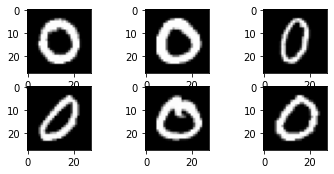

Int64Index([0, 2, 12, 15, 35, 37], dtype='int64')


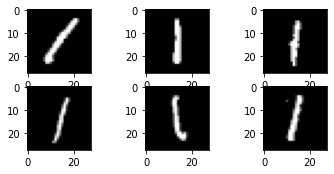

Int64Index([16, 22, 24, 34, 44, 55], dtype='int64')


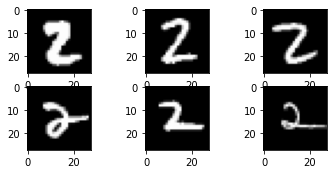

Int64Index([7, 9, 13, 14, 25, 36], dtype='int64')


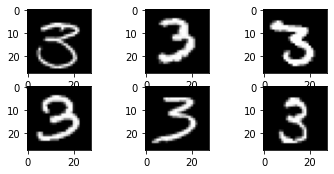

Int64Index([3, 32, 39, 42, 43, 49], dtype='int64')


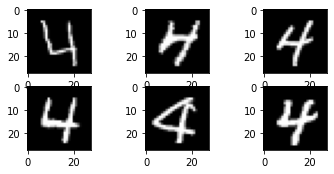

Int64Index([8, 19, 51, 62, 80, 99], dtype='int64')


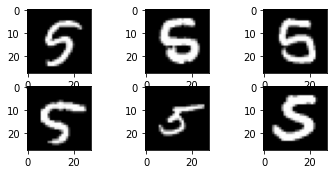

Int64Index([21, 26, 45, 64, 72, 74], dtype='int64')


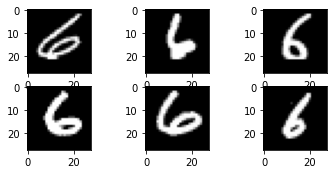

Int64Index([6, 18, 29, 47, 48, 50], dtype='int64')


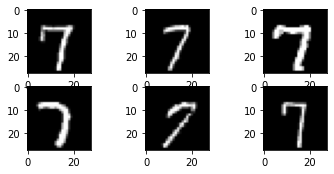

Int64Index([10, 20, 30, 67, 82, 87], dtype='int64')


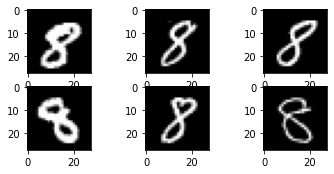

Int64Index([11, 27, 28, 31, 33, 40], dtype='int64')


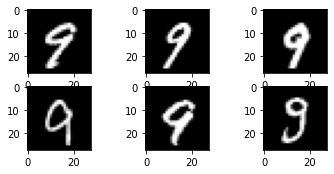

<Figure size 432x288 with 0 Axes>

In [5]:

X_extract = (train_data.iloc[:,1:].values).astype('float32') # all pixel values
y_labels = train_data.iloc[:,y_key_pos].values.astype('int32') # only labels i.e targets digits

#Convert train datset to (num_images, img_rows, img_cols) format 
X_square = X_extract.reshape(X_extract.shape[0], 28, 28)

for counter0 in range(10):
    first_six=train_data['label'].loc[train_data['label'] == counter0][0:6].index
    print(first_six)

    for counter1 in range(6):
        plt.subplot(330 + (counter1+1))
        plt.imshow(X_square[first_six[counter1]], cmap=plt.get_cmap('gray'))
        #plt.title(X_square[i]);
    plt.show()
    plt.clf()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df, y_labels, random_state=0)

lda = LDA(n_components=5)
# Taking in as second argument the Target as labels
X_LDA_2D = lda.fit_transform(X_train, y_train )

print('Accuracy of classifier on training set: {:.2f}'.format(lda.score(X_train, y_train)))
print('Accuracy of classifier on test set: {:.2f}'.format(lda.score(X_test,  y_test)))


df2=test_data
y_predict=lda.predict(df2)


column_names=[output_str,train_data.keys()[y_key]]
output=pd.DataFrame(columns=column_names)
output[output_str]= np.arange(1,df2.shape[0]+1,1)
output[train_data.keys()[y_key]]= y_predict           
output.to_csv(problem_name+'.csv',index=0)
    
    

Accuracy of classifier on training set: 0.88
Accuracy of classifier on test set: 0.87


Confusion matrix, without normalization
[[ 956    2    3    5    5   11   16    1   16    0]
 [   0 1147   12    3    2    3    4    0   19    0]
 [  17   30  874   40   24    4   36    5   40    7]
 [   3   17   32  890    6   47    2   19   30   24]
 [   3    8    7    1  920    9    7    0    7   72]
 [  13    8    3   41    6  771   14    5   46   23]
 [  12   10   11    1   13   29  960    0    7    1]
 [  11   31   15    7   31    3    1  946    2   82]
 [   6   43    6   41   12   55   13    0  798   21]
 [  15    3    2   12   54    7    0   48    8  867]]
Normalized confusion matrix
[[9.42e-01 1.97e-03 2.96e-03 4.93e-03 4.93e-03 1.08e-02 1.58e-02 9.85e-04
  1.58e-02 0.00e+00]
 [0.00e+00 9.64e-01 1.01e-02 2.52e-03 1.68e-03 2.52e-03 3.36e-03 0.00e+00
  1.60e-02 0.00e+00]
 [1.58e-02 2.79e-02 8.12e-01 3.71e-02 2.23e-02 3.71e-03 3.34e-02 4.64e-03
  3.71e-02 6.50e-03]
 [2.80e-03 1.59e-02 2.99e-02 8.32e-01 5.61e-03 4.39e-02 1.87e-03 1.78e-02
  2.80e-02 2.24e-02]
 [2.90e-03 7.74e-03 6

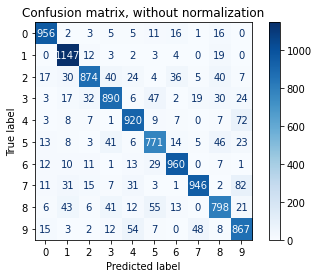

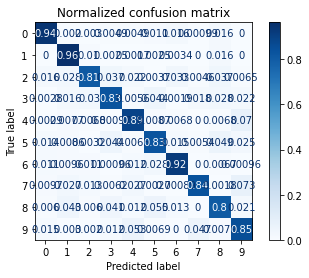

In [7]:
classifier=lda
class_names=['0','1','2','3','4','5','6','7','8','9']

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)